# Exploratory Data Analysis - Retail

Objective: Conduct 'Exploratory Data Analysis' on the 'Samplebusiness' dataset. As a business manager, aim to identify areas of improvement to enhance profitability.

## About the Business

A compact retail establishment in the United States specializes in selling Furniture, Office Supplies, and Technology products. The customer base includes mass consumers, corporate clients, and home offices. The dataset provides detailed information on sales, profit, and geographical aspects related to individual orders.

**Business Questions**

- Identifying the Best Selling and Most Profitable Category.
- Determining the Best Selling and Most Profitable Sub-Category.
- Identifying the Top Selling Sub-Category.
- Determining the Most Profitable Customer Segment.
- Identifying the Preferred Ship Mode.
- Determining the Most Profitable Region.
- Identifying the City with the Highest Number of Sales.


In [12]:
# Import libraries and alias for easy reading
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

---
## Data Exploration

In [13]:
# Read in data in CSV format and look it
business = pd.read_csv('G:/Otros ordenadores/Mi portátil/Data Science/DataCamp/Portfolios Data Analyst/Business/SampleBusiness.csv')
business.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
# Preview last 5 rows of data set
business.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Mix of Variables:

- The dataset includes a mix of categorical, geographical, and numerical variables.
- Categorical variables include "Ship Mode," "Segment," "Country," "City," "State," "Region," "Category," and "Sub-Category."
- Numerical variables include "Sales," "Quantity," "Discount," and "Profit."

### Order Details:

- Each row in the dataset represents an order for an item, providing details such as sales amount, quantity, discount, and profit.
- The "Ship Mode" indicates the mode of shipment for each order.
- The "Segment" categorizes customers into different segments (e.g., Consumer, Corporate).

### Geographical Aspects:

- Geographical information is available, including "Country," "City," "State," "Postal Code," and "Region."
- This allows for analysis based on the location of the orders.

### Sales and Profit Insights:

- "Sales" represents the total sales amount for each order.
- "Profit" indicates the profit generated from each order.
- It's noteworthy that some orders have a negative profit, indicating a loss.

In [15]:
# Shape of data set
business.shape

(9994, 13)

In [16]:
# Summarised information of data set
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are a total of 9,994 entries, which includes the header, and the dataset comprises 13 columns. The data types are accurate and align with their respective values.

---

## Data Preprocessing
Prior to delving into the analysis, it is essential to perform data cleaning or "scrub the dirt" from the dataset.

In the course of this analysis, we will address prevalent issues, including the identification and resolution of missing and duplicate data.

**Addressing Missing Values**

Following that, we will examine the dataset to identify and manage any occurrences of null values.

In [17]:
# Find the number of null values for all columns
business.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The outcome reveals that the dataset is free from any null values.


**Identifying Duplicate Data**

Subsequently, our focus will shift towards determining the presence of duplicate entries within the dataset.

In [18]:
# Find the number of duplicate data
business.duplicated().sum()

17


Certainly. If there are 17 duplicated rows, let's proceed with running another function to visualize the duplicated data.

In [19]:
# Show the duplicated rows
business[business.duplicated(keep = 'last')]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


We will then run the drop_duplicates() function to drop the duplicated rows.

In [20]:
# Drop the duplicated rows
business.drop_duplicates(inplace = True)

In [21]:
# Find the no. of rows and columns
business.shape

(9977, 13)

Certainly! We can verify that the elimination of duplicated rows has taken place, resulting in a reduction from 9993 to 9977 rows.

**Generating a Calculated Field**

Next, we'll establish a calculated field for Profit Margin. The computation involves applying the formula (Profit / Sales) * 100.

In [22]:
business['Profit Margin %'] = (business.Profit / business.Sales) * 100
business.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25



With the dataset now cleaned, we can advance to conducting statistical analysis!

---
## Descriptive Statistics
In this section, we'll perform exploratory data analysis using df.describe(). We'll set 'include = 'all'' to ensure that categorical features are incorporated into the output.









In [23]:
# Get descriptive statistics summary
business.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


You may observe 'NaN' values in certain categorical columns, which is entirely acceptable. Categorical values are not intended for calculations, so we can disregard them.

Our primary focus is on examining the unique count and frequency of categorical features, such as:
- There are 4 ship modes and 3 customer segments. Approximately half of the orders originate from the Consumer segment using Standard Class shipment.
- The store offers 3 categories of items with 17 sub-categories. Office Supplies account for 60% of orders, and Binders contribute to a minimum of 15% of purchases.

Regarding numerical parameters, it's noteworthy that:
- 75% of orders yield a profit margin of at least 36%.
- Loss-making orders can incur losses of up to 275%. It is crucial to address these loss-making sales and take necessary actions.

We will conduct further analysis below to validate these observations.

---

## Exploratory Data Analysis

### 1. Identifying the Top-Selling and Most Profitable Category

When we refer to "Best Selling," we are examining Sales, while "Most Profitable" focuses on Profit. To analyze this, we will group Sales, Profit, and Quantity

In [24]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(business.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


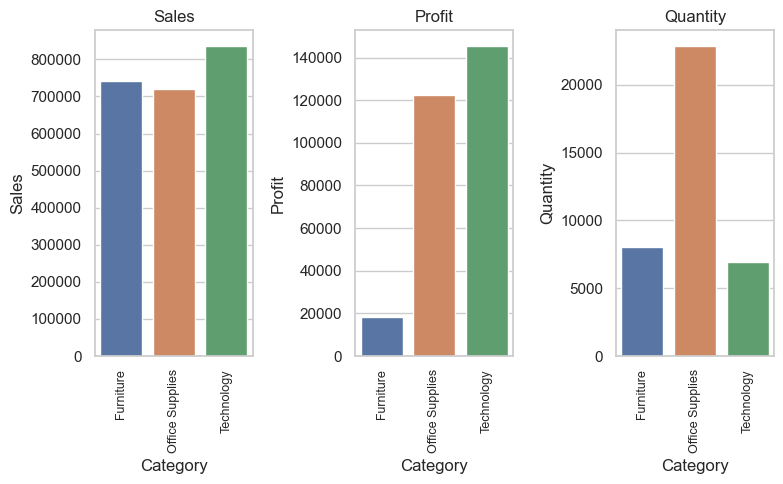

In [45]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Here are our findings:

- The sales figures across all three categories—Furniture, Office Supplies, and Technology—are relatively comparable.
- Technology emerges as the Best Selling category, and it's noteworthy that this category also holds the title of being the Most Profitable. The quantity sold is minimal, as these products typically constitute one-off purchases with a longer lifespan of around 4-5 years.
- Despite Furniture achieving sales levels similar to Technology, it stands out as the least profitable category, with minimal quantities sold.
- Office Supplies outshines in terms of quantity sold, driven by the affordability of the products in this category.


### 2. Identifying the Top-Selling and Most Profitable Sub-Category

In [26]:
# Group by sub-category
subcat_analysis = pd.DataFrame(business.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [27]:
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [44]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


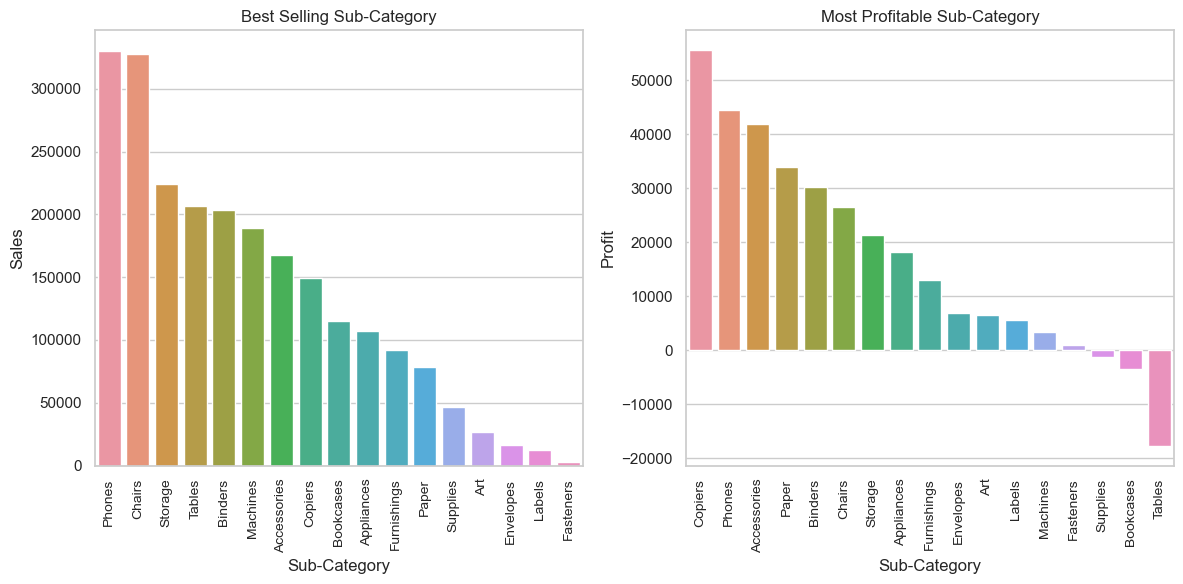

In [29]:
# Plot Bar Plots

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

Now, let's delve into the bar plots analysis:

- Phones and Chairs emerge as the two top-selling sub-categories.
- Copiers generate the highest profit, trailed by Phones, Accessories, Papers, and Binders. A strategic marketing emphasis should be placed on promoting these products.
- Conversely, Machines, Fasteners, Supplies, Bookcases, and Tables exhibit close to zero margin to losses. These are products that the Super Store may contemplate removing from the product catalog or adjusting sale prices and profit margins, or negotiating for lower prices from suppliers.

### 3. Identifying the Highest-Selling Sub-Category








In [30]:
subcat_quantity = pd.DataFrame(business.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


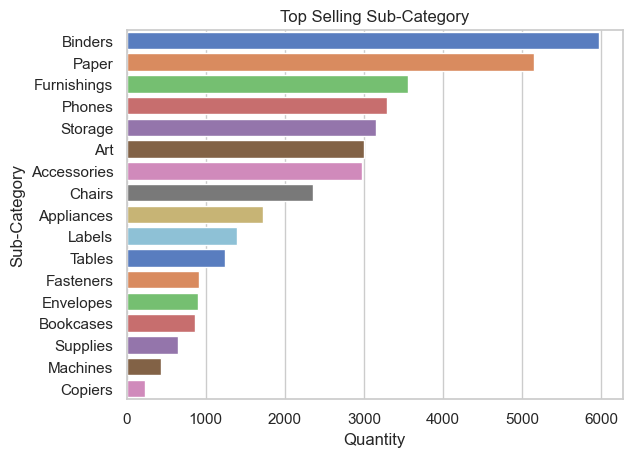

In [31]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In this analysis, it becomes evident that:

- Super Store should prioritize maintaining consistently well-stocked inventory for the highest-selling sub-categories, including Binders, Paper, Furnishings, and Phones.
- Despite its status as the most profitable, Copiers have a relatively low sales volume, totaling only 234. This can be attributed to the product's nature as a relatively expensive office equipment typically used for a few years, explaining its lower sales volume compared to other items.

### 4. Identifying the Most Profitable Customer Segment

In [32]:
segment_analysis = pd.DataFrame(business.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


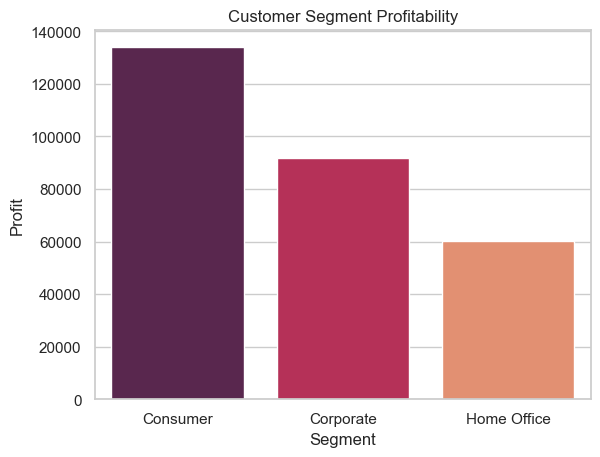

In [43]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

The Consumer segment proves to be the most profitable, followed by the Corporate Segment and Home Office. Therefore, the marketing strategy should prioritize or intensify efforts to retain customers in the Consumer and Corporate segments.

### 5. Determining the Preferred Ship Mode

In [34]:
business.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


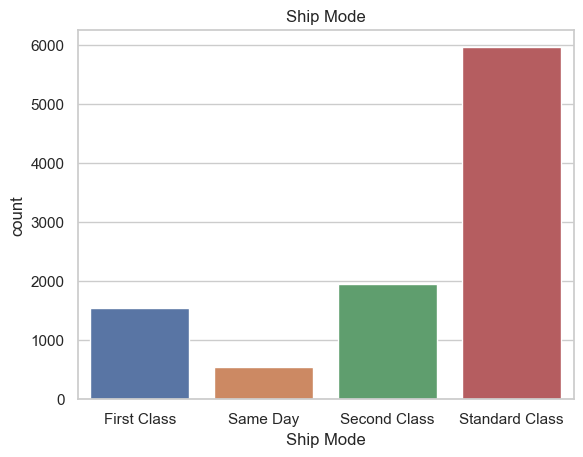

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Ship Mode' to categorical data type
business['Ship Mode'] = business['Ship Mode'].astype('category')

# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(data=business, x='Ship Mode')
plt.title("Ship Mode")
plt.show()


By a significant margin, Standard Class emerges as the overwhelmingly preferred method of shipment, likely owing to its cost-effectiveness. The other modes seem to lack popularity among customers, potentially due to higher associated costs.

### 6. Identifying the Most Profitable Region

In [42]:
region_analysis = pd.DataFrame(business.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


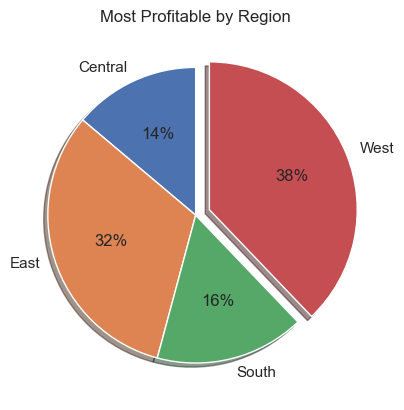

In [37]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()


The East and West regions stand out as the most profitable.



### 7. Determining the City with the Highest Sales Volume

In [38]:
city_sales = pd.DataFrame(business.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False))
top10 = city_sales[:10]
top10


,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [41]:
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


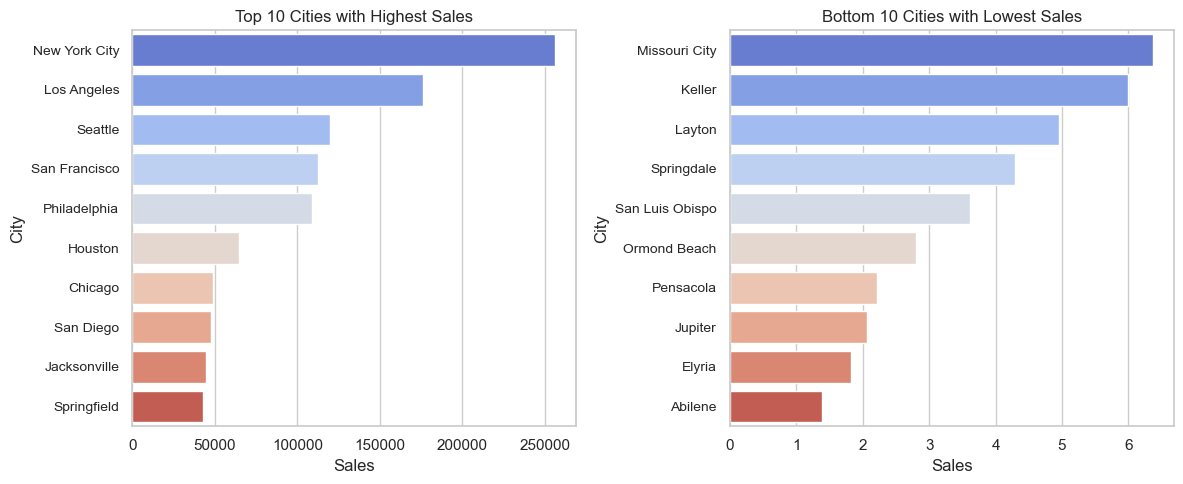

In [40]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top10c = sns.barplot(data=top10, y=top10.index, x=top10.Sales, palette="coolwarm", ax=axis[0])
top10c.set_title("Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(), size=10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data=bottom10, y=bottom10.index, x=bottom10.Sales, palette="coolwarm", ax=axis[1])
bottom10c.set_title("Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()


There exists a substantial contrast between cities with the highest and lowest sales. To optimize marketing efforts, the strategy should be tailored towards the top 10 cities.

---

## Strategic Recommendation

In reviewing our business questions, we present high-level recommendations for your consideration.

**Business Questions**

- Identifying the Best Selling and Most Profitable Category.
- Determining the Best Selling and Most Profitable Sub-Category.
- Identifying the Top Selling Sub-Category.
- Determining the Most Profitable Customer Segment.
- Identifying the Preferred Ship Mode.
- Determining the Most Profitable Region.
- Identifying the City with the Highest Number of Sales.

**Recommendations**

- Emphasize the Technology sub-category and prioritize Phones and Chairs due to their high sales and profitability. Consider bundling them with less profitable products like Bookcases, Tables, and Chairs to mitigate losses.
- Given the significant losses associated with selling Bookcases and Tables, consider bundling them with high-selling or profitable sub-categories such as Chairs, Copiers, Phones, and Office Supplies.
- Tailor packages for Home Office customers, offering a convenient selection of office essentials like tables, chairs, phones, copiers, storage, labels, fasteners, and bookcases.
- Evaluate options for loss-making products like Supplies, Bookcases, and Tables, including the possibility of removing them from the catalog or negotiating with suppliers for more favorable pricing.
- With Consumer and Corporate Segments constituting over 70% of the customer base, focus marketing efforts, especially in the East and West regions, on the top 10 cities with the highest sales. Introduce special promotions and bundles for mass consumer and home office segments, and utilize promotional emails or flyers to target these markets.


You're welcome! If you have any more questions or if there's anything else I can help you with, feel free to ask. Happy analyzing!